<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson6/dz6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  30 баллов
* Задача 2 &mdash;  30 баллов






-----

In [ ]:
# Bot check

# HW_ID: phds_hw6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split

### Задача 1


В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём следующие датасеты:

**Профиль физика:** https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi. Будем предсказывать длительность солнечных вспышек. Используйте файл с данными до 2018 года.

**Профиль биология:** https://archive.ics.uci.edu/dataset/1/abalone. Будем предсказывать возраст моллюсков.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

#### Загрузка и предобработка данных:

In [4]:
!wget https://archive.ics.uci.edu/static/public/1/abalone.zip
!unzip abalone.zip

--2023-10-28 10:16:28--  https://archive.ics.uci.edu/static/public/1/abalone.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.zip.1’

abalone.zip.1           [ <=>                ]  54.06K  --.-KB/s    in 0.1s    

2023-10-28 10:16:29 (426 KB/s) - ‘abalone.zip.1’ saved [55357]

Archive:  abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


**Биология:**

In [5]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Уберем категориальный признак:

In [6]:
data = data.drop('Sex', axis=1)

In [7]:
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

Разбейте данные на обучающую выборку и на валидацию, выделив на валидацию 25% данных.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию. Для того, чтобы исследовать зависимость от количества деревьев, обучите лес **один** раз и посчитайте предсказания каждого отдельного дерева в лесу. После этого используйте усреднение первых $k$ предсказаний в качестве ответа для $k$ деревьев.

In [17]:
from tqdm import tqdm
# start with depth estimation
rf = [RandomForestRegressor(max_depth=max_depth).fit(X_train,y_train) for max_depth in tqdm(range(3,26))]

100%|██████████| 23/23 [00:28<00:00,  1.25s/it]


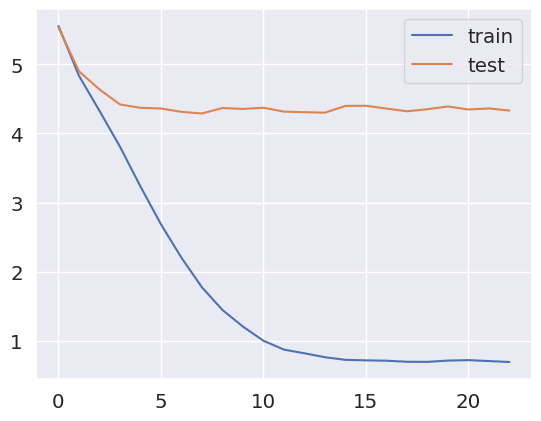

In [13]:
from sklearn.metrics import mean_squared_error as MSE
train_acc = [MSE(ens.predict(X_train),y_train) for ens in rf]
test_acc = [MSE(ens.predict(X_test),y_test) for ens in rf]

plt.plot(train_acc,label='train')
plt.plot(test_acc,label='test')
plt.legend()

In [19]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
# start with depth estimation
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
train_pred = [est.predict(X_train) for est in rf.estimators_]
test_pred = [est.predict(X_test) for est in rf.estimators_]

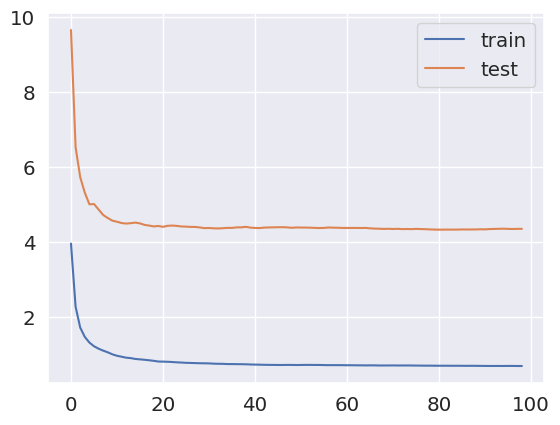

In [24]:
train_cum_pred = [sum(train_pred[:i])/i for i in range(1,len(train_pred))]
test_cum_pred = [sum(test_pred[:i])/i for i in range(1,len(test_pred))]

train_acc = [MSE(pred,y_train) for pred in train_cum_pred]
test_acc = [MSE(pred,y_test) for pred in test_cum_pred]


plt.plot(train_acc,label='train')
plt.plot(test_acc,label='test')
plt.legend()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:**

1. На обоих графиках значение ошибки на тесте с ростом параметра выходит на плато. Характер убывания до плато стремительный - гиперболический. В обоих случаях пространство параметров модели расширялось - > модель становилась сложнее. Видим, что есть порог при котором усложнение модели не ведет к улучшению предсказательной силы.

2. Случайные лес устойчив к переобучению. Несмотря на увеличении числа параметров, предсказания случайного леса на тестовой выборке не ухудшаются. Это свойство крайне полезно для быстрой разведки данных без подбора гиперпараметров на кросс-валидации.

3. При анализе ошибки удобно использовать декомпозоцию итоговой ошибки на вариацию предсказания модели $\mathbf{D}\hat{y}(x)$ и смещение $(\mathbf{E}(\hat{y}(x)-f(x,\varepsilon)))^2$. Уточню, что под вариацией предсказания модели понимают её чувствительность к изменениям обучающей выборки D
Потому ошибку переобучения дерева связывают с первым членом -> глубокое дерево "запоминает" целевую переменную на выборке, потому крайне чувствительно к D.

Для случайного леса значение variance зависит от двух компонент:

$$
    Variance = D(\hat{y}(x))=\frac{1}{T} D(\hat{y_1}(x)) + \frac{T-1}{T} cov(y1,y2)
$$

- ошибка отдельного экземпляра гиперболически убывает с ростом экспертов
- фиксированная ошибка корреляции между экземплярами, которая примерно постоянна при большом числе экспертов

Тогда выход на плато можем интерпертировать как зануление первого члена - ошибки отдельного экземпляра деленного на число экземпляров - и фиксированное значение скореллированности экземпляров. Выход на плато по скореллированности связан с ограниченностью вариативности в экземпляры. Новые экземпляры перестают отличаются от старых.


Уточню, что устойчивость к переобучению доступна только на достаточно больших выборках и при ограниченном размере признакового пространствах. Случайный лес скорее всего будет переобучаться на выборке из 100 элементов, здесь лучше использовать регрессию :)


Обучите случайный лес с параметрами по умолчанию и выведите mse на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются?

In [56]:
[
    MSE(
        RandomForestRegressor().fit(X_train,y_train).predict(X_test),y_test
    )
for _ in range(3)
]

[4.375841339712918, 4.38992076555024, 4.427584401913876]

**Ответ:** в основе обучения random forest лежит стохастический принципы модификации обучающие выборки \
Закладывается два основных принципа:
- выборка для обучения деревьев составляется случайно с возвратом - bootstrap/bagging
- признаковое пространство для каждого из дерева случайным образом ограничено - Random Subspaces

Стохастическая природа аугментаций приводит к различию результатов на тестовой выборке -> позволяет численно оценить качество предсказания

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [29]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={
      'max_depth': list(range(5,10)),
      'n_estimators': list(range(10,50,5)),
  }

tree_gridsearch = GridSearchCV(estimator,param_grid)

In [30]:
tree_gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45]})

Выведите найденные оптимальные параметры. Поясните, согласуются ли наблюдения с теорией.

In [31]:
tree_gridsearch.best_params_

{'max_depth': 8, 'n_estimators': 40}

**Вывод**  Да, полученные деревья получились достаточно глубокими. Число моделей в ансамбле также достаточно велико -> вариативность экспертов позволяет получать лучшее качество предсказания

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [45]:
max_depth = 8
n_estimators = 40

Оценим качество предсказаний обученного решающего леса.

In [46]:
estimator=RandomForestRegressor(max_depth = max_depth,n_estimators = n_estimators )
MSE(estimator.fit(X_train,y_train).predict(X_test),y_test)

4.384830472072345

Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [48]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)  # allows duplicate elements
    return list(map(list,chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))))

c = [(combo,MSE(estimator.fit(X_train[combo],y_train).predict(X_test[combo]),y_test)) for combo in tqdm(powerset(X_train.columns))]


127it [00:42,  2.97it/s]


In [49]:
sorted(c, key = lambda x: x[1])

[(['Length',
   'Diameter',
   'Height',
   'Whole weight',
   'Shucked weight',
   'Viscera weight',
   'Shell weight'],
  4.286298273960023),
 (['Length', 'Diameter', 'Whole weight', 'Shucked weight', 'Shell weight'],
  4.291985373351069),
 (['Length',
   'Diameter',
   'Height',
   'Whole weight',
   'Shucked weight',
   'Shell weight'],
  4.305895078772976),
 (['Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Shell weight'],
  4.328177511108222),
 (['Length', 'Height', 'Whole weight', 'Shucked weight', 'Shell weight'],
  4.33868345878465),
 (['Height', 'Whole weight', 'Shucked weight', 'Shell weight'],
  4.3844429038534996),
 (['Diameter',
   'Whole weight',
   'Shucked weight',
   'Viscera weight',
   'Shell weight'],
  4.439364012890179),
 (['Length',
   'Height',
   'Whole weight',
   'Shucked weight',
   'Viscera weight',
   'Shell weight'],
  4.4405565787872865),
 (['Diameter',
   'Height',
   'Whole weight',
   'Shucked weight',
   'Viscera weight',
   'Shell weight']

Постройте график зависимости метрики mse на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

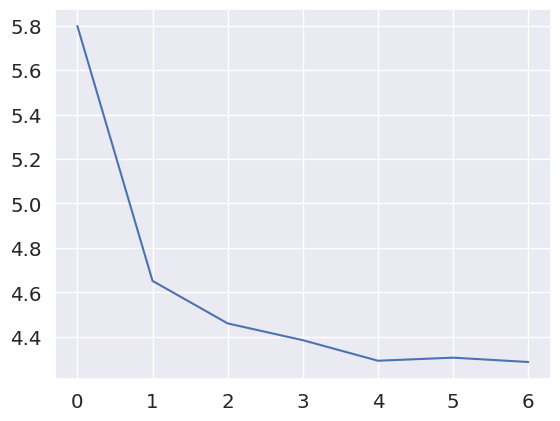

In [55]:
# находим лучший accuracy при фиксированном размере признакового пространства
plt.plot([min([item[1] for item in c if len(item[0])==feat_dim]) for feat_dim in range(1,8)])

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

** Ответ:** не все признаки могут быть информативны для конкретной задачи. Видим, что для предсказания достаточно 4 признаков. \
Достоинство Random forest заключается в том, что качество предсказания не ухудшается при увеличении признакового пространства. Таким образом можно проводить разведку информативных параметров.

Зафиксируйте наилучшие гиперпараметры.

Проведите исследование скорости обучения и предсказания.

Засеките время обучения и предсказания, например, с помощью модуля `time`.



In [63]:
import time
start = time.time()
N = 100
[RandomForestRegressor(max_depth = max_depth,n_estimators = n_estimators).fit(X_train,y_train) for i in tqdm(range(N))]
end = time.time()

print((end - start)/N)

100%|██████████| 100/100 [00:44<00:00,  2.26it/s]

0.44333561897277834


In [69]:
import time
start = time.time()
N = 1_000
[estimator.predict(X_test) for i in range(N)]
end = time.time()

print((end - start)/N)

0.0079440860748291


Посчитайте среднюю глубину дерева в случайном лесе. Используйте функцию `get_depth()` для отдельных деревьев леса.
Посчитайте среднее количество листьев, используя функцию `get_n_leaves()` для отдельных деревьев.



In [59]:
np.mean([est.get_depth() for est in estimator.estimators_]), np.mean([est.get_n_leaves() for est in estimator.estimators_])

(8.0, 180.8)

Сделайте выводы. Какие деревья обычно используются в случайном лесу? Как вы предполагаете, как от этого зависит скорость обучения и предсказания?

**Ответ** преимущественно используются деревья с максимально доступной глубиной. В среднем используются 3/4 возможных сплитов. Из-за этого деревья долго предсказывают и обучаются даже на малых выборках порядка 1000 сэмплов.

Исследуйте важности признаков для следующих случаев:



*   Решающее  дерево
*   Случайный лес
*   Лес из первых 5-10 деревьев случайного леса из предыдущего пункта.

Также проанализируйте качество моделей выше.

Сделайте выводы. Отличаются ли посчитанные важности? Есть ли связь важностей признаков и качества моделей? О чем говорят посчитанные важности признаков?



Text(0.5, 1.0, 'Decision Tree')

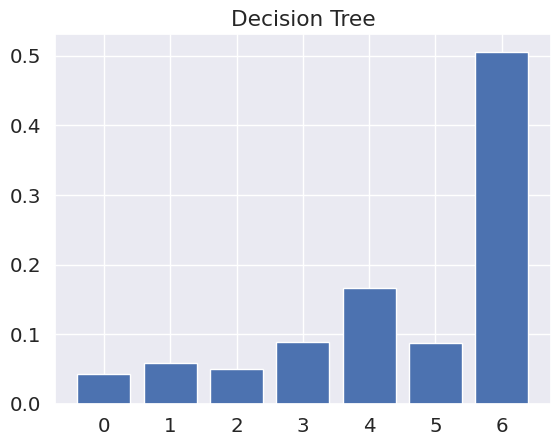

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train,y_train)

plt.bar(range(7),dt.feature_importances_)
plt.title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

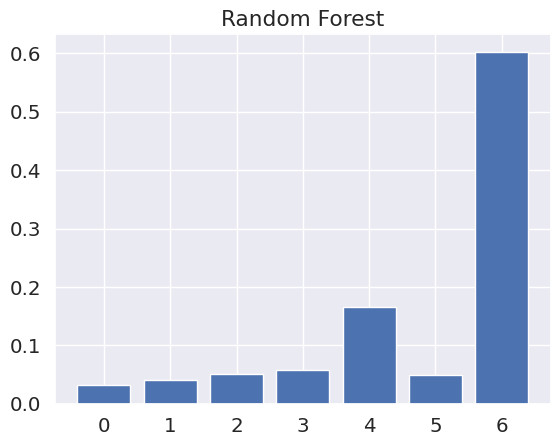

In [76]:
plt.bar(range(7),estimator.feature_importances_)
plt.title('Random Forest')

Text(0.5, 1.0, 'Random Forest @ first 10 trees')

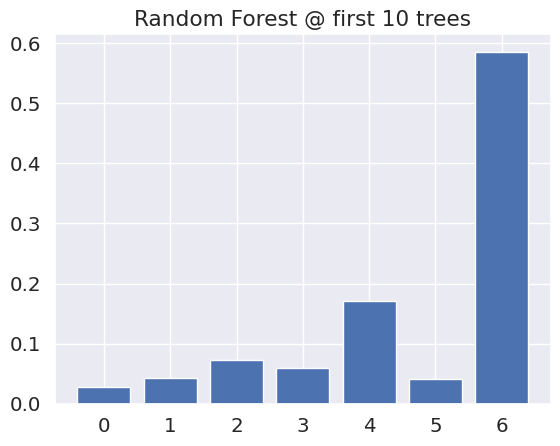

In [80]:
plt.bar(range(7),sum([est.feature_importances_ for est in estimator.estimators_[:10]]) /10 )
plt.title('Random Forest @ first 10 trees')

**Ответ:** Есть вариации в Feature Importance, но их нельзя назвать значимыми.

### Задача 2

На лекции была получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите случайный лес и беггинг на моделях ридж-регрессии.


Для реализации данного эксперимента используйте класс беггинг-модели
`sklearn.ensemble.BaggingRegressor` , у которого используйте следующие поля:
* `base_estimator` — базовая модель;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Эти модели можно получить с помощью поля `estimators_` у обученной беггинг-модели. Корреляции моделей можно смотреть как корреляции векторов их предсказаний.

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним. Какую оценку коэффициента корреляции вы используете и почему?

In [103]:
# Cлучайный лес
rf =RandomForestRegressor(n_estimators = 100).fit(X_train,y_train)
pred = [est.predict(X_test) for est in rf.estimators_]

In [104]:
from scipy import stats
# берем верхнюю часть матрицы корреляции и усредняем
print('Корреляция Пирсона',np.mean(np.corrcoef(pred)[np.triu_indices(100,1)]))
print('Корреляция Спирмэна', np.mean(stats.spearmanr(pred,axis=1).statistic[np.triu_indices(100,1)]))

Корреляция Пирсона 0.5712383307752028
Корреляция Спирмэна 0.6122298581578265


In [106]:
# Ансамбль регрессий
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge

ridge_ensemble = BaggingRegressor(base_estimator=Ridge(),max_features=7,n_estimators=100)

ridge_ensemble.fit(X_train,y_train)
pred = [est.predict(X_test) for est in ridge_ensemble.estimators_]

In [107]:
from scipy import stats
# берем верхнюю часть матрицы корреляции и усредняем
print('Корреляция Пирсона',np.mean(np.corrcoef(pred)[np.triu_indices(100,1)]))
print('Корреляция Спирмэна', np.mean(stats.spearmanr(pred,axis=1).statistic[np.triu_indices(100,1)]))

Корреляция Пирсона 0.9984718297546298
Корреляция Спирмэна 0.9984733881823918


Ранговая и численная корреляции мало отличаются. Анализ различаться не будет

Скоррелированность в ансамбле деревьев ниже до двух раз. Поэтому ансамбли дереьев теоритически должны иметь меньшую ошибку в вариативности модели.